# Renderings of the contributions to the kinetic energy from the radial and tangential motions in the F4 run

In [1]:
import matplotlib.pyplot as plt
%matplotlib nbagg
import matplotlib.colors as colors
import numpy as np
import time
import moments
import ppm

/usr/local/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
yp = ppm.yprofile("/rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F4/")
moms = moments.Moments("/rpod1/PPM/FVandMoms48/AGBTP_M2.0Z1.e-5/F4", use_e3d=True)
moms.set_tool_paths(dir_read_ppm='/rpod2/home/andrassy/ppmstar/code/moments_data_reader/src_read_ppm/', \
                    dir_e3d='/rpod2/home/andrassy/ppmstar/code/moments_data_reader/src_e3d/')

Reading attributes from file  YProfile-01-1959.bobaaa
Analyzing headers ...
There are 1960 YProfile files in the /rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F4/ directory.
Ndump values range from 0 to 1959
Time values range from 86.5493 to 162264.0


In [3]:
def get_Ekr_Ekt(moms, yp, dump):
    r1D = yp.get('Y', fname=dump-1, resolution='l')
    Rho1D = yp.get('Rho', fname=dump-1, resolution='l')
    Rho = moms.fromradprof(r1D, Rho1D)
    
    rad = moments.array([moms.get("coord1(Rho)", dump), \
                         moms.get("coord2(Rho)", dump), \
                         moms.get("coord3(Rho)", dump)])
    rad_norm = rad/moments.norm(rad)
    RhoU = moments.array([moms.get("RhoUx", dump), \
                          moms.get("RhoUy", dump), \
                          moms.get("RhoUz", dump)])
    RhoUr = moments.dot(RhoU, rad_norm)
    RhoUt = moments.norm(RhoU - RhoUr*rad_norm)
    Ekr = RhoUr*RhoUr/(2.*Rho*Rho)
    Ekt = RhoUt*RhoUt/(2.*Rho*Rho)
    
    idx = range(192 - 10, 192 + 10)
    Ekr_slice = np.sum(Ekr[:, ::-1, idx], axis=2)/len(idx)
    Ekt_slice = np.sum(Ekt[:, ::-1, idx], axis=2)/len(idx)
    
    return Ekr_slice, Ekt_slice

def show_plots(data, vlim, ifig0):
    res = 768
    norm = colors.LogNorm(vmin=vlim[0], vmax=vlim[1], clip=True)
    interpolation = 'spline16'
    cmap = 'viridis'

    ifig = ifig0; plt.close(ifig); plt.figure(ifig, figsize=(1., 1.), dpi=res)
    plt.gca().set_position([0., 0., 1., 1.])
    img = np.transpose((1e43/1e27)*data['Ekr'])
    plt.imshow(img, norm=norm, interpolation=interpolation, cmap=cmap)
    plt.axis('off')
    plt.savefig('Ekr-slice_3-{:04d}.png'.format(data['dump']), dpi=res)

    ifig = ifig0 + 1; plt.close(ifig); plt.figure(ifig, figsize=(1., 1.), dpi=res)
    plt.gca().set_position([0., 0., 1., 1.])
    img = np.transpose((1e43/1e27)*data['Ekt'])
    plt.imshow(img, norm=norm, interpolation=interpolation, cmap=cmap)
    plt.axis('off')
    plt.savefig('Ekt-slice_3-{:04d}.png'.format(data['dump']), dpi=res)

In [4]:
moms.cycles

['0560',
 '0970',
 '1440',
 '1464',
 '1465',
 '1466',
 '1467',
 '1468',
 '1469',
 '1470',
 '1630',
 '1860',
 '1906',
 '1907',
 '1908',
 '1909',
 '1910']

In [5]:
data = [{}, {}, {}, {}, {}]

In [6]:
idx = 0
data[idx]['dump'] = 560

t0 = time.time()
data[idx]['Ekr'], data[idx]['Ekt'] = get_Ekr_Ekt(moms, yp, data[idx]['dump'])
t1 = time.time()
print 'Data acquisition took {:.0f} s.'.format(t1 - t0)

Data acquisition took 713 s.


<IPython.core.display.Javascript object>


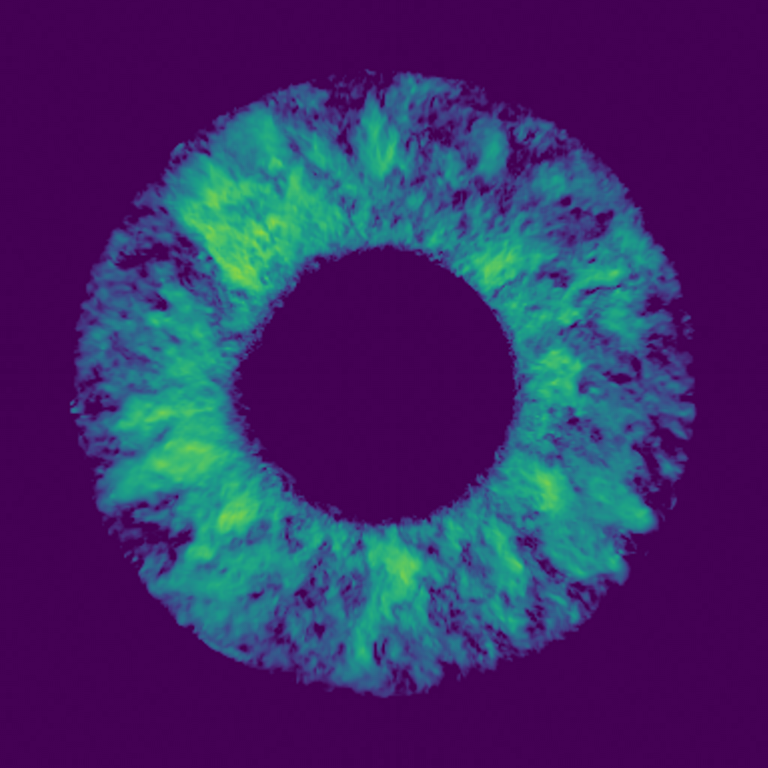

<IPython.core.display.Javascript object>


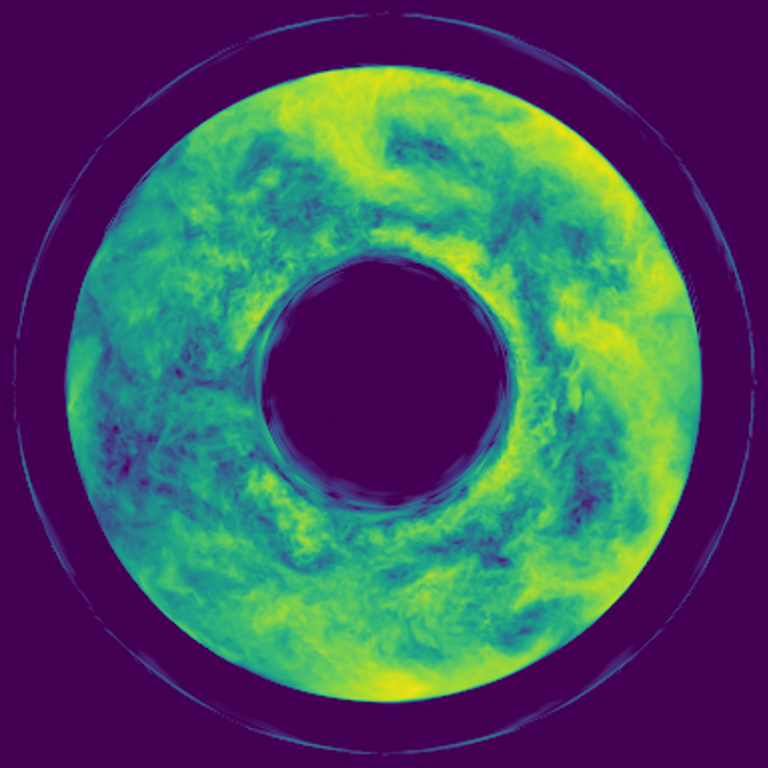

In [18]:
show_plots(data[0], (1e10, 3e12), 1)

In [8]:
idx = 1
data[idx]['dump'] = 970

t0 = time.time()
data[idx]['Ekr'], data[idx]['Ekt'] = get_Ekr_Ekt(moms, yp, data[idx]['dump'])
t1 = time.time()
print 'Data acquisition took {:.0f} s.'.format(t1 - t0)

Data acquisition took 576 s.


<IPython.core.display.Javascript object>


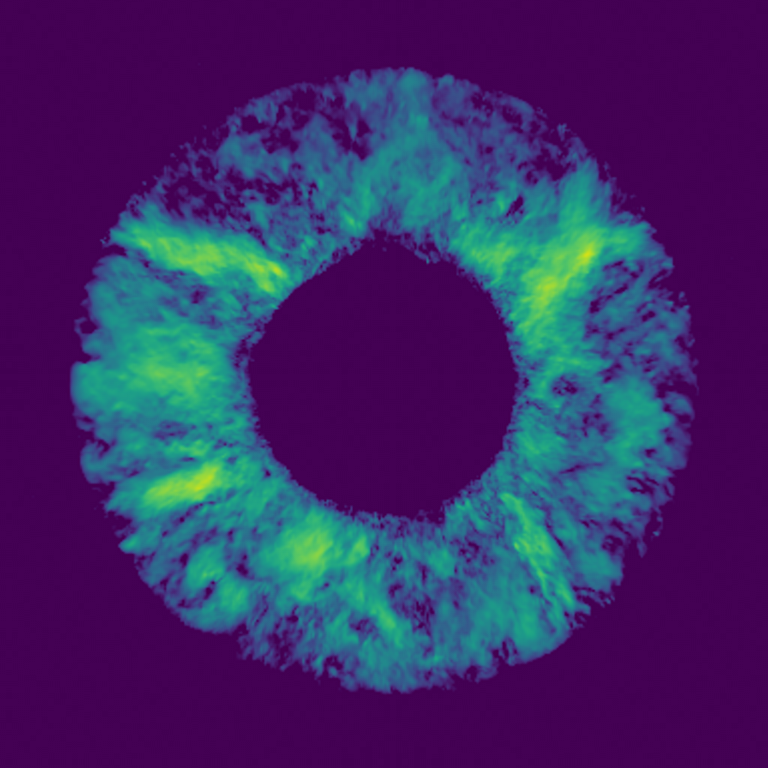

<IPython.core.display.Javascript object>


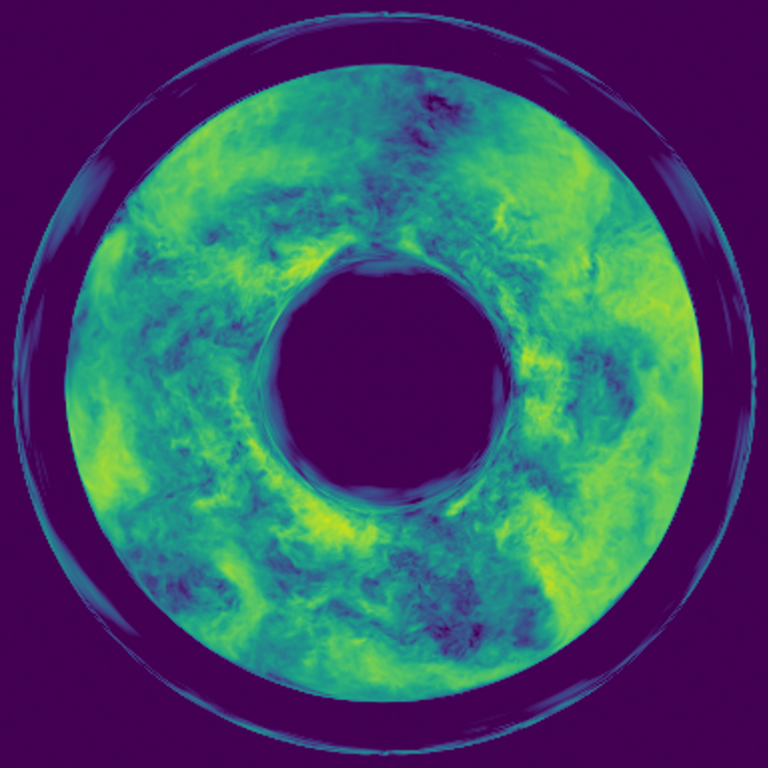

In [19]:
show_plots(data[1], (1e10, 3e12), 3)

In [10]:
idx = 2
data[idx]['dump'] = 1469

t0 = time.time()
data[idx]['Ekr'], data[idx]['Ekt'] = get_Ekr_Ekt(moms, yp, data[idx]['dump'])
t1 = time.time()
print 'Data acquisition took {:.0f} s.'.format(t1 - t0)

Data acquisition took 560 s.


<IPython.core.display.Javascript object>


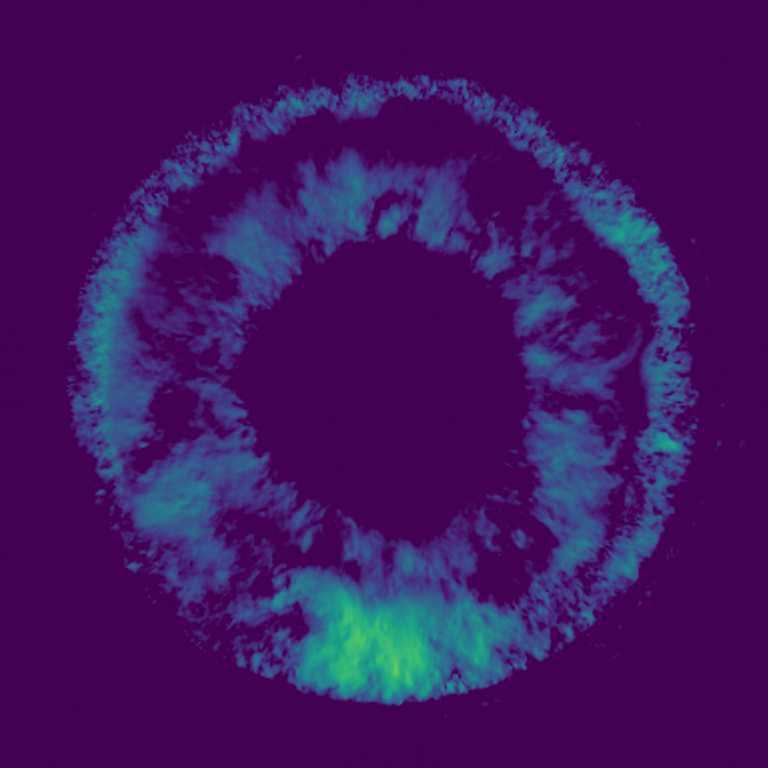

<IPython.core.display.Javascript object>


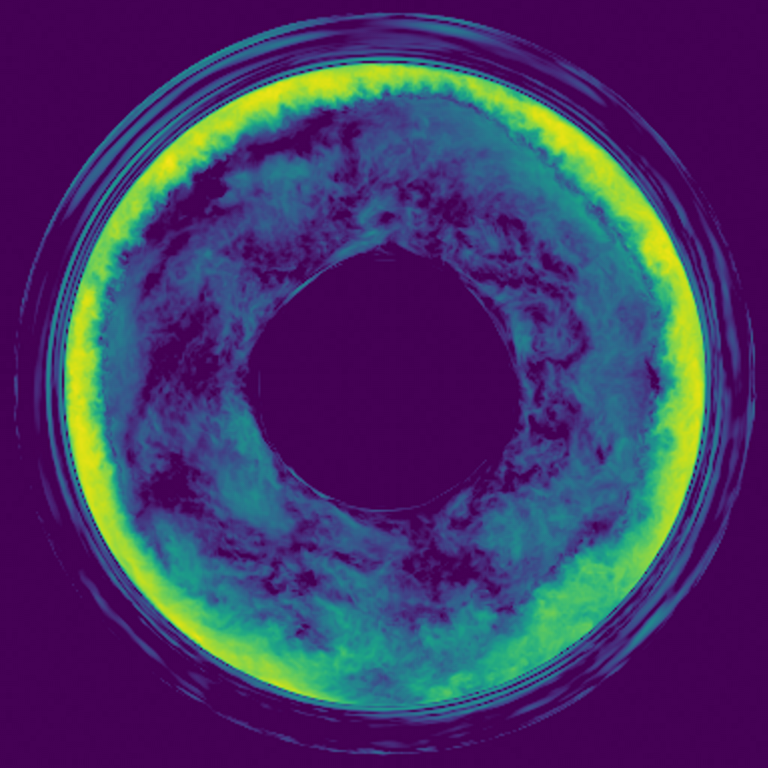

In [21]:
show_plots(data[2], (1e11, 3e13), 5)

In [12]:
idx = 3
data[idx]['dump'] = 1630

t0 = time.time()
data[idx]['Ekr'], data[idx]['Ekt'] = get_Ekr_Ekt(moms, yp, data[idx]['dump'])
t1 = time.time()
print 'Data acquisition took {:.0f} s.'.format(t1 - t0)

Data acquisition took 569 s.


<IPython.core.display.Javascript object>


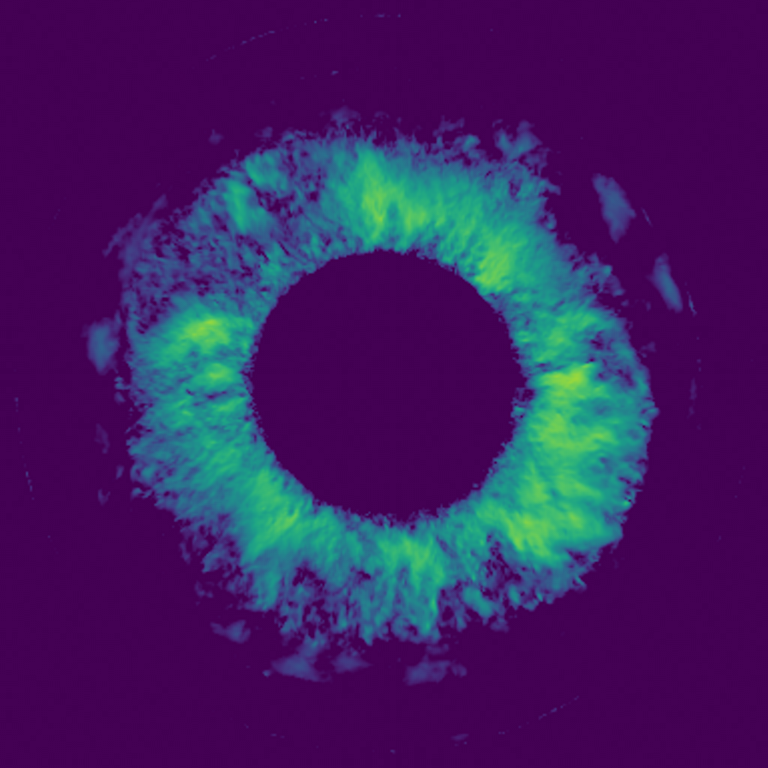

<IPython.core.display.Javascript object>


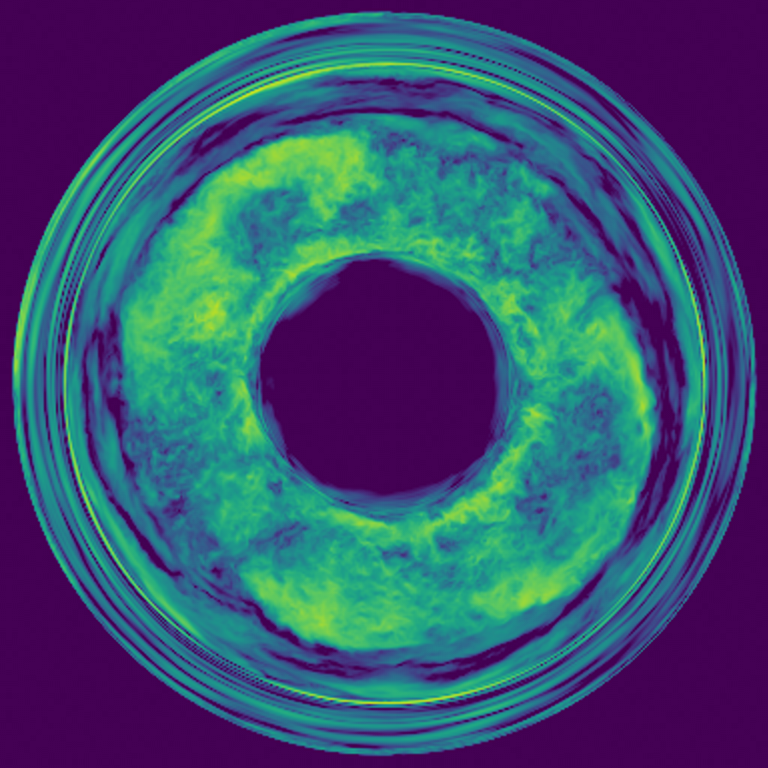

In [22]:
show_plots(data[3], (1e10, 3e12), 7)

In [14]:
idx = 4
data[idx]['dump'] = 1909

t0 = time.time()
data[idx]['Ekr'], data[idx]['Ekt'] = get_Ekr_Ekt(moms, yp, data[idx]['dump'])
t1 = time.time()
print 'Data acquisition took {:.0f} s.'.format(t1 - t0)

Data acquisition took 551 s.


<IPython.core.display.Javascript object>


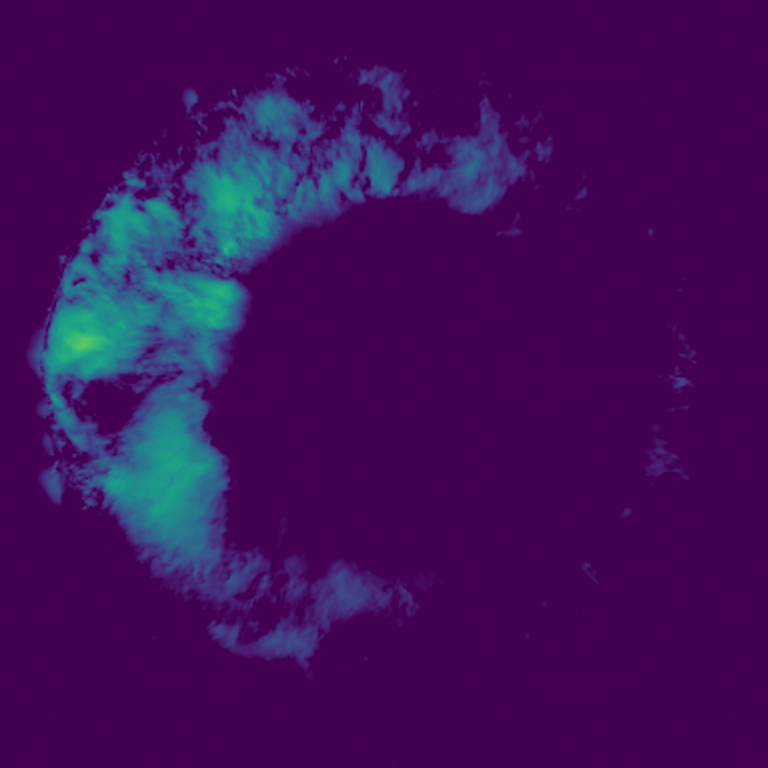

<IPython.core.display.Javascript object>


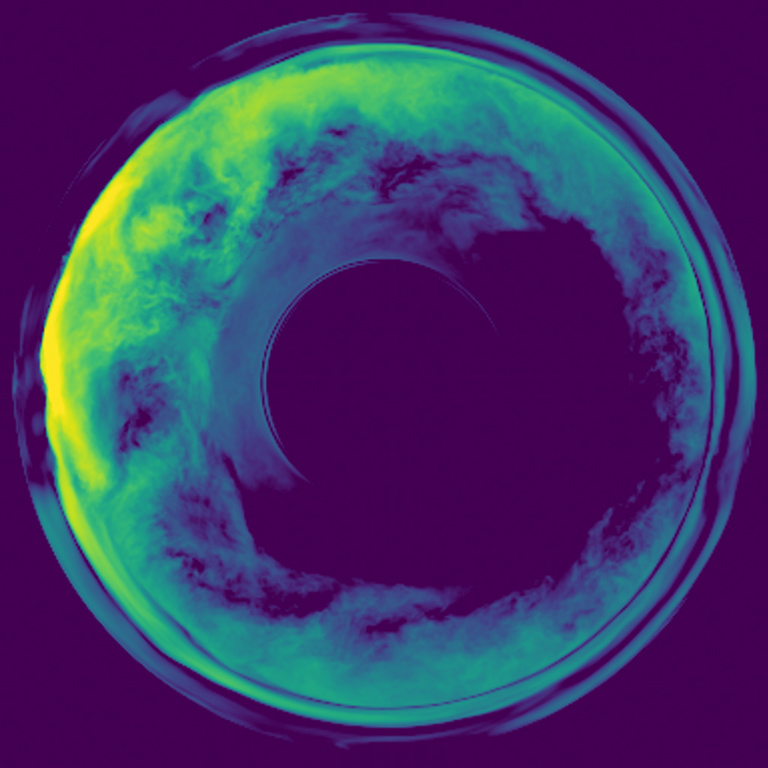

In [26]:
show_plots(data[4], (2e12, 6e14), 9)